In [43]:
import math
import geopandas as gpd
import pandas as pd
from shapely.geometry import MultiPolygon
import plotly.graph_objects as go
import plotly.express as px
import

import folium
from folium import Choropleth, Marker
from folium.plugins import HeatMap, MarkerCluster
print("Setup Complete")

Setup Complete


In [64]:
cal_fire_data = gpd.read_file("/DATASETS/CLIMATE_DATASETS/FIRE_DATASET/California_Fire_Perimeters_(Recent).shp")
cal_fire_data.head()

,OBJECTID,YEAR_,STATE,AGENCY,UNIT_ID,FIRE_NAME,INC_NUM,ALARM_DATE,CONT_DATE,CAUSE,COMMENTS,REPORT_AC,GIS_ACRES,C_METHOD,OBJECTIVE,FIRE_NUM,SHAPEAREA,SHAPELEN,geometry
0,21462,2020,CA,CDF,CZU,CZU LIGHTNING COMPLEX,00005205,2020-08-16,2020-09-24,1,None,86509.0,86553.460938,7,1,None,5.523185e+08,255052.193260,"MULTIPOLYGON (((-13594665.665 4447773.307, -13..."
1,21480,2020,CA,CDF,ORC,SILVERADO,20121364,2020-10-26,2020-11-02,14,None,0.0,12469.200195,7,1,None,7.312598e+07,65362.593575,"POLYGON ((-13103802.000 3995244.000, -13103693..."
2,21481,2020,CA,CDF,ORC,BLUE RIDGE,20121612,2020-10-26,2020-11-02,14,None,0.0,13694.530273,7,1,None,8.067187e+07,65838.875384,"POLYGON ((-13106401.000 4020965.000, -13106362..."
3,21482,2020,CA,CDF,ORC,BOND,20136890,2020-12-03,2020-12-07,14,None,0.0,6681.101074,7,1,None,3.920048e+07,52771.365477,"POLYGON ((-13095398.000 3994547.000, -13095325..."
4,21515,2020,CA,CCO,KRN,STAGECOACH,02033315,2020-08-03,2020-08-03,14,None,7750.0,7750.637207,1,1,None,4.737386e+07,46920.338200,"POLYGON ((-13188248.679 4224512.550, -13188385..."


In [65]:
cal_fire_data.GIS_ACRES.describe()

count    1.290000e+02
mean     5.816780e+04
std      1.161609e+05
min      5.062198e+03
25%      8.822024e+03
50%      2.131793e+04
75%      5.162466e+04
max      1.032699e+06
Name: GIS_ACRES, dtype: float64

In [71]:
cal_fire_data.dtypes


OBJECTID               int64
YEAR_                 object
STATE                 object
AGENCY                object
UNIT_ID               object
FIRE_NAME             object
INC_NUM               object
ALARM_DATE    datetime64[ns]
CONT_DATE     datetime64[ns]
CAUSE                  int64
COMMENTS              object
REPORT_AC            float64
GIS_ACRES            float64
C_METHOD               int64
OBJECTIVE              int64
FIRE_NUM              object
SHAPEAREA            float64
SHAPELEN             float64
geometry            geometry
duration               int64
year                   int64
month                  int64
dtype: object

In [67]:
# Change the dtype of Alarm date and cont_date
cal_fire_data['ALARM_DATE'] = pd.to_datetime(cal_fire_data['ALARM_DATE'])
#cal_fire_data['CONT_DATE'] = cal_fire_data['CONT_DATE'].astype('datetime64[ns]')
cal_fire_data['CONT_DATE'] = pd.to_datetime(cal_fire_data['CONT_DATE'])
cal_fire_data.dtypes

OBJECTID               int64
YEAR_                 object
STATE                 object
AGENCY                object
UNIT_ID               object
FIRE_NAME             object
INC_NUM               object
ALARM_DATE    datetime64[ns]
CONT_DATE     datetime64[ns]
CAUSE                  int64
COMMENTS              object
REPORT_AC            float64
GIS_ACRES            float64
C_METHOD               int64
OBJECTIVE              int64
FIRE_NUM              object
SHAPEAREA            float64
SHAPELEN             float64
geometry            geometry
dtype: object

In [70]:
# Compute the year column
cal_fire_data['year'] = cal_fire_data['ALARM_DATE'].dt.year
cal_fire_data['year'] = cal_fire_data['year'].sort_values()
cal_fire_data['month'] = cal_fire_data['ALARM_DATE'].dt.month


In [72]:
cal_fire_data.head()

,OBJECTID,YEAR_,STATE,AGENCY,UNIT_ID,FIRE_NAME,INC_NUM,ALARM_DATE,CONT_DATE,CAUSE,...,GIS_ACRES,C_METHOD,OBJECTIVE,FIRE_NUM,SHAPEAREA,SHAPELEN,geometry,duration,year,month
0,21462,2020,CA,CDF,CZU,CZU LIGHTNING COMPLEX,00005205,2020-08-16,2020-09-24,1,...,86553.460938,7,1,None,5.523185e+08,255052.193260,"MULTIPOLYGON (((-13594665.665 4447773.307, -13...",39,2020,8
1,21480,2020,CA,CDF,ORC,SILVERADO,20121364,2020-10-26,2020-11-02,14,...,12469.200195,7,1,None,7.312598e+07,65362.593575,"POLYGON ((-13103802.000 3995244.000, -13103693...",7,2020,10
2,21481,2020,CA,CDF,ORC,BLUE RIDGE,20121612,2020-10-26,2020-11-02,14,...,13694.530273,7,1,None,8.067187e+07,65838.875384,"POLYGON ((-13106401.000 4020965.000, -13106362...",7,2020,10
3,21482,2020,CA,CDF,ORC,BOND,20136890,2020-12-03,2020-12-07,14,...,6681.101074,7,1,None,3.920048e+07,52771.365477,"POLYGON ((-13095398.000 3994547.000, -13095325...",4,2020,12
4,21515,2020,CA,CCO,KRN,STAGECOACH,02033315,2020-08-03,2020-08-03,14,...,7750.637207,1,1,None,4.737386e+07,46920.338200,"POLYGON ((-13188248.679 4224512.550, -13188385...",0,2020,8


In [78]:
latest_fire_data =  cal_fire_data.loc[cal_fire_data.ALARM_DATE>"2020-01-01"].copy()
latest_fire_data.sort_values('ALARM_DATE')

,OBJECTID,YEAR_,STATE,AGENCY,UNIT_ID,FIRE_NAME,INC_NUM,ALARM_DATE,CONT_DATE,CAUSE,COMMENTS,REPORT_AC,GIS_ACRES,C_METHOD,OBJECTIVE,FIRE_NUM,SHAPEAREA,SHAPELEN,geometry
6,21569,2020,CA,CDF,AEU,GRANT FIRE,00016543,2020-06-12,2020-06-12,2,None,5042.00,5.062198e+03,1,1,None,3.356084e+07,3.194467e+04,"POLYGON ((-13490462.000 4655244.000, -13490478..."
11,21618,2020,CA,CDF,SCU,CREWS,00004686,2020-07-05,2020-07-15,8,None,NaN,5.513000e+03,2,1,None,3.506083e+07,4.517098e+04,"POLYGON ((-13519091.900 4438860.494, -13519102..."
7,21580,2020,CA,CDF,FKU,MINERAL,00010219,2020-07-13,2020-07-26,14,None,29666.96,2.966696e+04,2,1,None,1.846336e+08,1.139814e+05,"POLYGON ((-13425044.636 4325786.972, -13425099..."
29,21745,2020,CA,CDF,LMU,HOG,00003874,2020-07-18,2020-08-28,14,795DCBB1-F228-4F7B-9C92-14999DC4B397,9564.00,9.566355e+03,7,1,None,6.686694e+07,8.567834e+04,"MULTIPOLYGON (((-13445698.136 4929615.517, -13..."
41,21875,2020,CA,CDF,LMU,GOLD,00003917,2020-07-20,2020-10-29,14,None,22614.00,2.265256e+04,7,1,None,1.614069e+08,1.291278e+05,"MULTIPOLYGON (((-13443927.613 5030372.059, -13..."
32,21756,2020,CA,NPS,BNP,CALDWELL,00000479,2020-07-22,2020-09-01,1,None,80859.00,8.122437e+04,7,1,None,5.907320e+08,2.360725e+05,"POLYGON ((-13536959.355 5136449.174, -13536953..."
31,21755,2020,CA,NPS,YNP,BLUEJAY,00000054,2020-07-25,2020-11-19,1,None,6922.00,6.921987e+03,7,2,None,4.499221e+07,5.587513e+04,"MULTIPOLYGON (((-13311760.228 4561838.821, -13..."
30,21748,2020,CA,USF,SRF,RED SALMON COMPLEX,00000643,2020-07-27,2020-11-19,1,599BC281-404B-4F3E-BE7F-9A8F7B3E9E56,142386.00,1.438363e+05,8,1,None,1.026602e+09,4.649420e+05,"MULTIPOLYGON (((-13724176.440 5013954.702, -13..."
37,21776,2020,CA,BLM,CDD,NADEAU,00011339,2020-07-29,2020-08-04,14,de1057cc-f14b-4352-b80d-75c93219e9ed,NaN,9.150368e+03,7,1,None,5.671527e+07,8.198561e+04,"POLYGON ((-13072546.662 4299994.559, -13072399..."
12,21625,2020,CA,CDF,RRU,APPLE,00096640,2020-07-31,2020-08-09,14,Auto-generated by EGP-IRWIN,NaN,3.320931e+04,2,1,None,1.961457e+08,1.501011e+05,"POLYGON ((-12998908.799 4032128.631, -12998870..."


In [46]:
latest_fire_data = latest_fire_data[['YEAR_', 'UNIT_ID', 'FIRE_NAME', 'ALARM_DATE', 'CONT_DATE', 'CAUSE', 'GIS_ACRES', 'geometry']]
latest_fire_data

,YEAR_,UNIT_ID,FIRE_NAME,ALARM_DATE,CONT_DATE,CAUSE,GIS_ACRES,geometry
0,2020,CZU,CZU LIGHTNING COMPLEX,2020-08-16,2020-09-24,1,8.655346e+04,"MULTIPOLYGON (((-13594665.665 4447773.307, -13..."
1,2020,ORC,SILVERADO,2020-10-26,2020-11-02,14,1.246920e+04,"POLYGON ((-13103802.000 3995244.000, -13103693..."
2,2020,ORC,BLUE RIDGE,2020-10-26,2020-11-02,14,1.369453e+04,"POLYGON ((-13106401.000 4020965.000, -13106362..."
3,2020,ORC,BOND,2020-12-03,2020-12-07,14,6.681101e+03,"POLYGON ((-13095398.000 3994547.000, -13095325..."
4,2020,KRN,STAGECOACH,2020-08-03,2020-08-03,14,7.750637e+03,"POLYGON ((-13188248.679 4224512.550, -13188385..."
5,2020,SHU,ZOGG,2020-09-27,2020-10-13,14,5.633805e+04,"POLYGON ((-13647007.799 4920044.727, -13647055..."
6,2020,AEU,GRANT FIRE,2020-06-12,2020-06-12,2,5.062198e+03,"POLYGON ((-13490462.000 4655244.000, -13490478..."
7,2020,FKU,MINERAL,2020-07-13,2020-07-26,14,2.966696e+04,"POLYGON ((-13425044.636 4325786.972, -13425099..."
8,2020,BEU,CARMEL,2020-08-18,2020-09-06,10,6.996942e+03,"POLYGON ((-13548897.222 4362496.671, -13548824..."
9,2020,BEU,RIVER,2020-08-16,2020-09-04,1,5.021382e+04,"MULTIPOLYGON (((-13544574.959 4379177.157, -13..."


<AxesSubplot:>

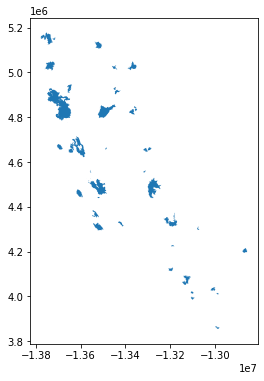

In [74]:
latest_fire_data.plot(figsize=(8,6))

In [79]:
print("CRS:", latest_fire_data.crs)

CRS: epsg:3857


In [80]:
# Use WGS 84 (epsg:4326) as the geographic coordinate system
latest_fire_data = latest_fire_data.to_crs(epsg=4326)
latest_fire_data.head()

,OBJECTID,YEAR_,STATE,AGENCY,UNIT_ID,FIRE_NAME,INC_NUM,ALARM_DATE,CONT_DATE,CAUSE,COMMENTS,REPORT_AC,GIS_ACRES,C_METHOD,OBJECTIVE,FIRE_NUM,SHAPEAREA,SHAPELEN,geometry
0,21462,2020,CA,CDF,CZU,CZU LIGHTNING COMPLEX,00005205,2020-08-16,2020-09-24,1,None,86509.0,86553.460938,7,1,None,5.523185e+08,255052.193260,"MULTIPOLYGON (((-122.12296 37.06215, -122.1233..."
1,21480,2020,CA,CDF,ORC,SILVERADO,20121364,2020-10-26,2020-11-02,14,None,0.0,12469.200195,7,1,None,7.312598e+07,65362.593575,"POLYGON ((-117.71346 33.74971, -117.71248 33.7..."
2,21481,2020,CA,CDF,ORC,BLUE RIDGE,20121612,2020-10-26,2020-11-02,14,None,0.0,13694.530273,7,1,None,8.067187e+07,65838.875384,"POLYGON ((-117.73680 33.94161, -117.73645 33.9..."
3,21482,2020,CA,CDF,ORC,BOND,20136890,2020-12-03,2020-12-07,14,None,0.0,6681.101074,7,1,None,3.920048e+07,52771.365477,"POLYGON ((-117.63796 33.74451, -117.63731 33.7..."
4,21515,2020,CA,CCO,KRN,STAGECOACH,02033315,2020-08-03,2020-08-03,14,None,7750.0,7750.637207,1,1,None,4.737386e+07,46920.338200,"POLYGON ((-118.47205 35.44494, -118.47329 35.4..."


In [81]:
ca_fires_2020 = latest_fire_data[['FIRE_NAME', 'geometry']].set_index('FIRE_NAME')
ca_fires_2020.head()

,geometry
FIRE_NAME,
CZU LIGHTNING COMPLEX,"MULTIPOLYGON (((-122.12296 37.06215, -122.1233..."
SILVERADO,"POLYGON ((-117.71346 33.74971, -117.71248 33.7..."
BLUE RIDGE,"POLYGON ((-117.73680 33.94161, -117.73645 33.9..."
BOND,"POLYGON ((-117.63796 33.74451, -117.63731 33.7..."
STAGECOACH,"POLYGON ((-118.47205 35.44494, -118.47329 35.4..."


In [92]:
 
latest_fire_data.set_index('FIRE_NAME', inplace=True)
latest_fire_data.head()

KeyError: "None of ['FIRE_NAME'] are in the columns"

In [101]:
latest_fire_data = latest_fire_data[['GIS_ACRES']]
latest_fire_data['FIRE_NAME'] = latest_fire_data.index
latest_fire_data
#print(len(latest_fire_data))

/tmp/ipykernel_783204/3977193350.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  latest_fire_data['FIRE_NAME'] = latest_fire_data.index


,GIS_ACRES,FIRE_NAME
FIRE_NAME,,
CZU LIGHTNING COMPLEX,8.655346e+04,CZU LIGHTNING COMPLEX
SILVERADO,1.246920e+04,SILVERADO
BLUE RIDGE,1.369453e+04,BLUE RIDGE
BOND,6.681101e+03,BOND
STAGECOACH,7.750637e+03,STAGECOACH
ZOGG,5.633805e+04,ZOGG
GRANT FIRE,5.062198e+03,GRANT FIRE
MINERAL,2.966696e+04,MINERAL
CARMEL,6.996942e+03,CARMEL


In [102]:


m_1 = folium.Map(location=[37.77, -122.43], tiles='cartodbpositron', zoom_start=5)
Choropleth(geo_data=ca_fires_2020['geometry'].__geo_interface__, 
           data=latest_fire_data, 
           columns=['FIRE_NAME','GIS_ACRES']
           key_on="feature.id", 
           highlight=True,
           fill_color='YlOrRd', 
           name = 'CA Fires',
           legend_name='2020 California Fire Extent',
          ).add_to(m_1)
folium.LayerControl(collapsed=False).add_to(m_1)
NIL = folium.features.GeoJson(
    data = latest_fire_data, 
    control=False,
    tooltip=folium.features.GeoJsonTooltip(
        fields=['FIRE_NAME','GIS_ACRES'],
        aliases=['FIRE_NAME','GIS_ACRES'],
        style=("background-color: white; color: #333333; font-family: arial; font-size: 12px; padding: 10px;") 
    )
)
m_1.add_child(NIL)
m_1.keep_in_front(NIL)
m_1

ValueError: Cannot render objects with any missing geometries:                           GIS_ACRES              FIRE_NAME
FIRE_NAME                                                 
CZU LIGHTNING COMPLEX  8.655346e+04  CZU LIGHTNING COMPLEX
SILVERADO              1.246920e+04              SILVERADO
BLUE RIDGE             1.369453e+04             BLUE RIDGE
BOND                   6.681101e+03                   BOND
STAGECOACH             7.750637e+03             STAGECOACH
ZOGG                   5.633805e+04                   ZOGG
GRANT FIRE             5.062198e+03             GRANT FIRE
MINERAL                2.966696e+04                MINERAL
CARMEL                 6.996942e+03                 CARMEL
RIVER                  5.021382e+04                  RIVER
SCU COMPLEX            3.963990e+05            SCU COMPLEX
CREWS                  5.513000e+03                  CREWS
APPLE                  3.320931e+04                  APPLE
BOBCAT                 1.159980e+05                 BOBCAT
WALLBRIDGE             5.520889e+04             WALLBRIDGE
HENNESSEY              3.053516e+05              HENNESSEY
GLASS                  6.748434e+04                  GLASS
LOYALTON               4.672088e+04               LOYALTON
SHEEP                  2.954112e+04                  SHEEP
DOLAN                  1.245273e+05                  DOLAN
NORTH COMPLEX          3.187767e+05          NORTH COMPLEX
CASTLE                 1.706478e+05                 CASTLE
CREEK                  3.798822e+05                  CREEK
DEVIL                  8.871933e+03                  DEVIL
SLATER                 1.574298e+05                 SLATER
LAKE                   3.099939e+04                   LAKE
VALLEY                 1.638953e+04                 VALLEY
SNOW                   6.253437e+03                   SNOW
AUGUST COMPLEX FIRES   1.032699e+06   AUGUST COMPLEX FIRES
HOG                    9.566355e+03                    HOG
RED SALMON COMPLEX     1.438363e+05     RED SALMON COMPLEX
BLUEJAY                6.921987e+03                BLUEJAY
CALDWELL               8.122437e+04               CALDWELL
DOME                   4.421109e+04                   DOME
RATTLESNAKE            8.422837e+03            RATTLESNAKE
BACCARAT               1.045636e+04               BACCARAT
MOUNTAIN VIEW          2.037449e+04          MOUNTAIN VIEW
NADEAU                 9.150368e+03                 NADEAU
NORTH                  6.882267e+03                  NORTH
SLINK                  2.675168e+04                  SLINK
W-5 COLD SPRINGS       8.481727e+04       W-5 COLD SPRINGS
GOLD                   2.265256e+04                   GOLD